In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np


In [2]:
df=pd.read_csv('TSLA.csv.xls')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Year,Month
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,29,2010,6
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,30,2010,6
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,1,2010,7
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,2,2010,7
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,6,2010,7


In [6]:
df_1=df.drop('Date',axis=1)

In [7]:
X=df_1.drop('Close',axis=1)
Y=df_1['Close']
fea_names=X.columns

In [8]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
fea_sel=RandomForestRegressor()

rfe=RFE(fea_sel,n_features_to_select=9)
fit=rfe.fit(X,Y)

print(f'THE SELECTED FEATURES ARE : {fit.n_features_}')

print(f'the ranking of featurez are :{fit.ranking_}')

print(f'the {fit.support_}')

selected_feature_names = [fea_names[i] for i in range(len(fea_names)) if fit.support_[i]]

print(selected_feature_names)
DF1=pd.DataFrame({'SELETEC FEATURES':selected_feature_names})

DF1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=9 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(


THE SELECTED FEATURES ARE : 8
the ranking of featurez are :[1 1 1 1 1 1 1 1]
the [ True  True  True  True  True  True  True  True]
['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Day', 'Year', 'Month']


,SELETEC FEATURES
0,Open
1,High
2,Low
3,Adj Close
4,Volume
5,Day
6,Year
7,Month


<Axes: >

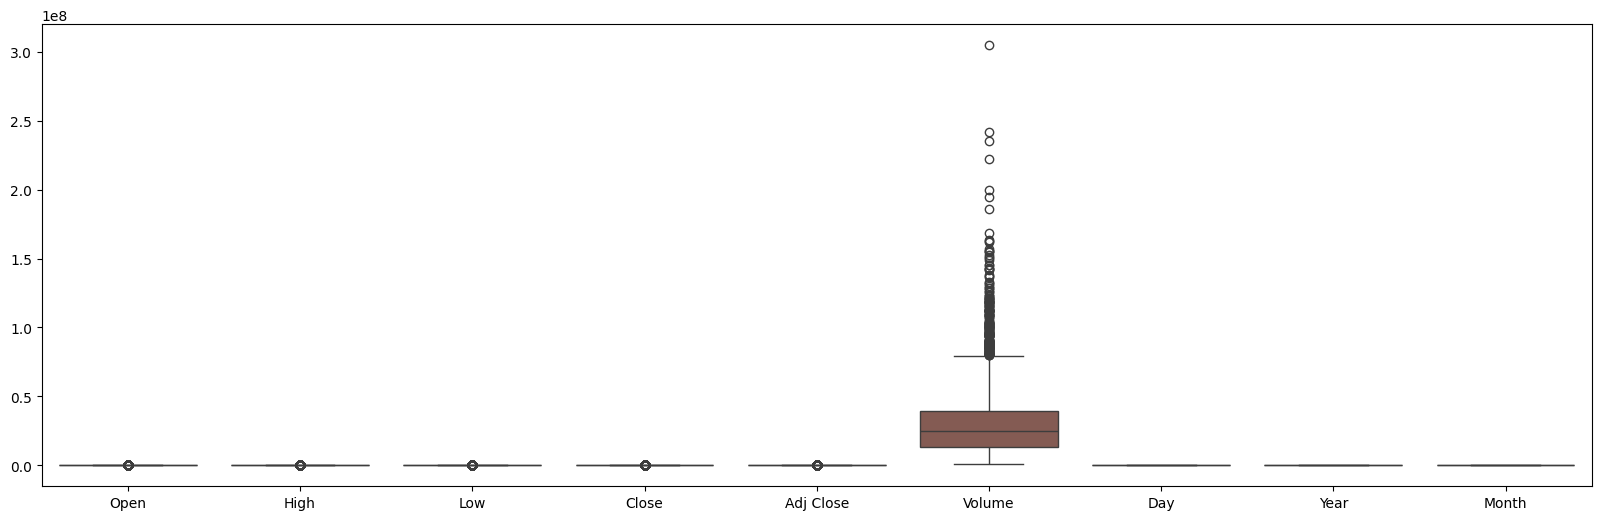

In [9]:
plt.figure(figsize=(20,6))
sns.boxplot(df_1)

In [10]:
lower_bound=df_1['Volume'].quantile(0.05)
upper_bound=df_1['Volume'].quantile(0.95)

df_1['Volume']=df_1['Volume'].clip(lower=lower_bound,upper=upper_bound)


<Axes: ylabel='Volume'>

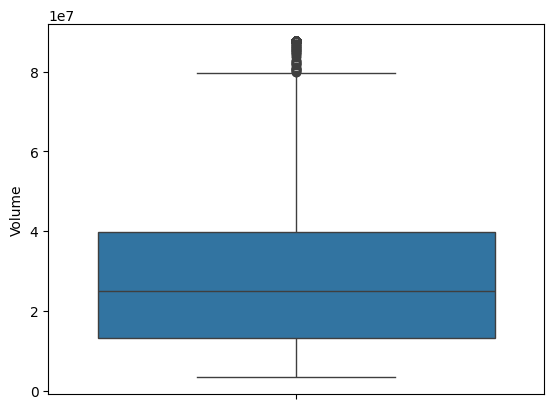

In [11]:
sns.boxplot(df_1['Volume'])

In [12]:
df_1.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Day          0
Year         0
Month        0
dtype: int64

In [13]:
df_1['Close_1']=df_1['Close'].shift(1)

In [14]:
df_1.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Day          0
Year         0
Month        0
Close_1      1
dtype: int64

In [15]:
df_1['Close_1']=df_1['Close_1'].fillna(df_1['Close_1'].mean())

In [16]:
df_1.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Day          0
Year         0
Month        0
Close_1      0
dtype: int64

In [17]:
X=df_1.drop(columns=['Volume','Close','Day','Year','Month'])
Y=df_1['Close']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=False)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### LINEAR REGRESSION MODEL

In [20]:
from sklearn.linear_model import LinearRegression
Model_LR=LinearRegression()


Model_LR.fit(X_train,Y_train)

LinearRegression()

In [21]:
y_PreD_LR=Model_LR.predict(X_test)

In [22]:
print(Y_test.shape)

print(y_PreD_LR.shape)

Y_test = Y_test[:len(y_PreD_LR)]  


(592,)
(592,)


In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_linear_regresion=r2_score(Y_test,y_PreD_LR)
MSE_lr=mean_squared_error(Y_test,y_PreD_LR)
MAE_lr=mean_absolute_error(Y_test,y_PreD_LR)

print(f'THE R2 SCORE OF Linear Regression IS {r2_linear_regresion}')
print(f'THE MEAN SQUARED ERROR SCORE OF Linear Regresion IS {MSE_lr}')
print(f'THE MEAN ABSOULTE ERROR SCORE OF linear Regression IS {MAE_lr}')

THE R2 SCORE OF Linear Regression IS 1.0
THE MEAN SQUARED ERROR SCORE OF Linear Regresion IS 1.5388330998711283e-26
THE MEAN ABSOULTE ERROR SCORE OF linear Regression IS 8.958599627894237e-14


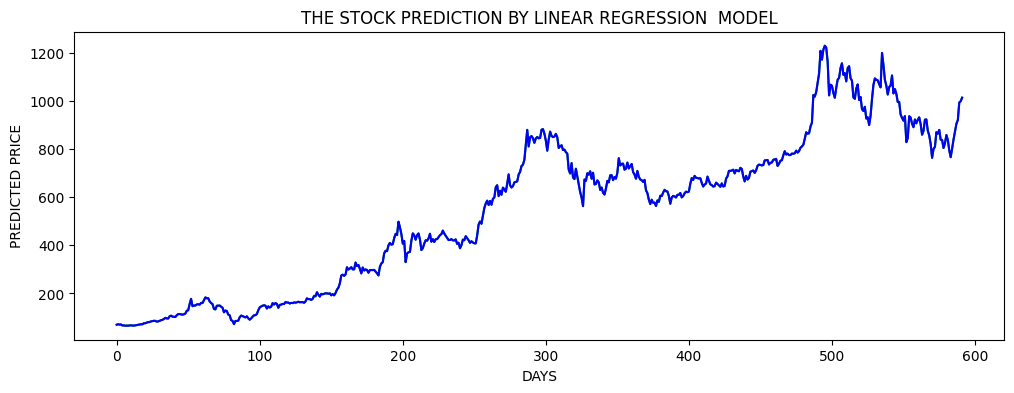

In [24]:
plt.figure(figsize=(12,4))
plt.plot(Y_test.values,label='ACTUAL PRICE',color='GREEN')
plt.plot(y_PreD_LR,label='PREDICTED PRICE',color='BLUE')
plt.title('THE STOCK PREDICTION BY LINEAR REGRESSION  MODEL')
plt.xlabel('DAYS')
plt.ylabel('PREDICTED PRICE')

plt.show()

### TESTING FOR LINEAR REGRESSION MODEL

In [25]:
input_deatails=[]

for i in X.columns:
    if i!='Close' and 'Volume' and 'Day'and'Year'and'Month':
        
        
        user=float(input(f'ENTER THE : {i}'))
        input_deatails.append(user)
        
        print(f'THE ENTER DEATILS FOR : {i} is {user}')
       
    
    
    
input_df=pd.DataFrame([input_deatails],columns=[i for i in X.columns if i!='Close'])

SC_input=scaler.transform(input_df)
predict=Model_LR.predict(SC_input)

predict_PRICE=predict[0]


print(F'THE PREDICTED CLOSE PRICE  WILL BE IS : {predict_PRICE}')   

THE ENTER DEATILS FOR : Open is 2.0
THE ENTER DEATILS FOR : High is 4.0
THE ENTER DEATILS FOR : Low is 1.0
THE ENTER DEATILS FOR : Adj Close is 2.98
THE ENTER DEATILS FOR : Close_1 is 2.0
THE PREDICTED CLOSE PRICE  WILL BE IS : 2.9799999999999907


### RANDOM FOREST MODEL


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model_1=RandomForestRegressor(random_state=42)

model_1.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [27]:
grid_rf = {
    'n_estimators': [100, 200, 300],  
    'min_samples_split': [5, 8, 9],   
    'max_depth': [5, 4, 7],
    'min_samples_leaf': [1, 2, 4]    
}

model_1_grid_search=GridSearchCV(estimator=model_1,param_grid=grid_rf,cv=4,verbose=2,n_jobs=2)

In [28]:
model_1_grid_search.fit(X_train,Y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': [5, 4, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 8, 9],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [29]:
model_1_grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [30]:
model_1_grid_search.best_score_

np.float64(0.7212155837379932)

In [31]:
pred_rf_test = model_1_grid_search.predict(X_test)
pred_rf_train = model_1_grid_search.predict(X_train)

In [61]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_random_forest=r2_score(Y_test,pred_rf_test)
MSE_rf=mean_squared_error(Y_test,pred_rf_test)
MAE_rf=mean_absolute_error(Y_test,pred_rf_test)

print(f'THE R2 SCORE OF RANDOM FOREST IS {r2_random_forest}')
print(f'THE MEAN SQUARED ERROR SCORE OF RANDOM FOREST IS {MSE_rf}')
print(f'THE MEAN ABSOULTE ERROR SCORE OF RANDOM FOREST IS {MAE_rf}')

THE R2 SCORE OF RANDOM FOREST IS -2.220305721074054
THE MEAN SQUARED ERROR SCORE OF RANDOM FOREST IS 323140.953872878
THE MEAN ABSOULTE ERROR SCORE OF RANDOM FOREST IS 472.2823538238462


### TESING FOR RANDOM FOREST MODEL

In [33]:
input_deatails=[]

for i in X.columns:
    if i!='Close' and 'Volume' and 'Day'and'Year'and'Month':
        
        
        user=float(input(f'ENTER THE : {i}'))
        input_deatails.append(user)
        
        print(f'THE ENTER DEATILS FOR : {i} is {user}')
       
    
    
    
input_df=pd.DataFrame([input_deatails],columns=[i for i in X.columns if i!='Close'])

SC_input=scaler.transform(input_df)
predict=model_1_grid_search.predict(SC_input)

predict_PRICE=predict[0]


print(F'THE PREDICTED CLOSE PRICE  WILL BE IS : {predict_PRICE}')   

THE ENTER DEATILS FOR : Open is 3.0
THE ENTER DEATILS FOR : High is 2.0
THE ENTER DEATILS FOR : Low is 1.0
THE ENTER DEATILS FOR : Adj Close is 1.11
THE ENTER DEATILS FOR : Close_1 is 2.0
THE PREDICTED CLOSE PRICE  WILL BE IS : 3.3711933130832112


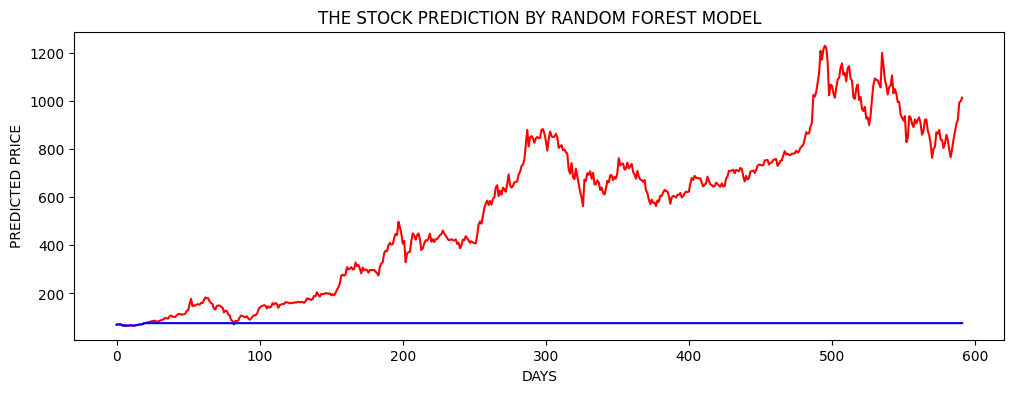

In [34]:
plt.figure(figsize=(12,4))
plt.plot(Y_test.values,label='ACTUAL PRICE',color='RED')
plt.plot(pred_rf_test,label='PREDICTED PRICE',color='BLUE')
plt.title('THE STOCK PREDICTION BY RANDOM FOREST MODEL')
plt.xlabel('DAYS')
plt.ylabel('PREDICTED PRICE')

plt.show()

### LONG SHORT TERM MEMORY (LSTM MODEL)

In [35]:
import tensorflow as tf 
import keras as keras


In [36]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras as keras

df = pd.read_csv('TSLA.csv.xls')
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date")
df['Day']=df['Date'].dt.day
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

df["Close_step_1"] = df["Close"].shift(1)


df = df.dropna().reset_index(drop=True)

features = ["Open", "Low", "High", 'Adj Close', "Close_step_1"]
target = "Close"

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features + [target]])



X = df_scaled[:, :-1] 
y = df_scaled[:, -1]   

X = X.reshape((X.shape[0], 1, X.shape[1]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)



In [37]:
model_lstm= tf.keras.models.Sequential()

In [38]:
model_lstm.add(tf.keras.layers.LSTM(units=50,return_sequences=True,input_shape=(1,5)))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model_lstm.add(tf.keras.layers.Dropout(0.2))

In [40]:
model_lstm.add(tf.keras.layers.LSTM(units=50,return_sequences=False))

In [41]:
model_lstm.add(tf.keras.layers.Dropout(0.2))

In [42]:
model_lstm.add(tf.keras.layers.Dense(units=25, activation='relu'))

In [43]:
model_lstm.add(tf.keras.layers.Dense(units=1))

In [44]:
model_lstm.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [45]:
history = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)
y_pred = model_lstm.predict(X_test).flatten()

Epoch 1/100
74/74 - 1s - 20ms/step - loss: 3.1216e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0973 - val_mean_absolute_error: 0.2629
Epoch 2/100
74/74 - 0s - 2ms/step - loss: 2.2081e-05 - mean_absolute_error: 0.0034 - val_loss: 0.0128 - val_mean_absolute_error: 0.0888
Epoch 3/100
74/74 - 0s - 2ms/step - loss: 6.4537e-06 - mean_absolute_error: 0.0019 - val_loss: 0.0096 - val_mean_absolute_error: 0.0758
Epoch 4/100
74/74 - 0s - 2ms/step - loss: 4.1587e-06 - mean_absolute_error: 0.0015 - val_loss: 0.0074 - val_mean_absolute_error: 0.0657
Epoch 5/100
74/74 - 0s - 2ms/step - loss: 3.7171e-06 - mean_absolute_error: 0.0014 - val_loss: 0.0069 - val_mean_absolute_error: 0.0627
Epoch 6/100
74/74 - 0s - 2ms/step - loss: 3.3075e-06 - mean_absolute_error: 0.0013 - val_loss: 0.0060 - val_mean_absolute_error: 0.0584
Epoch 7/100
74/74 - 0s - 2ms/step - loss: 3.1517e-06 - mean_absolute_error: 0.0013 - val_loss: 0.0060 - val_mean_absolute_error: 0.0581
Epoch 8/100
74/74 - 0s - 2ms/step - loss: 3.215

In [54]:
import numpy as np
import pandas as pd

def get_user_input():
    """Prompt user for stock market input values."""
    input_details = []
    for feature in features:
        value = float(input(f"Enter {feature}: "))
        input_details.append(value)
        print(f"You entered {feature}: {value}")
    return input_details

user_inputs = get_user_input()


input_df = pd.DataFrame([user_inputs], columns=features)

input_df["Close"] = 0  


scaled_input = scaler.transform(input_df.copy())  

scaled_input = scaled_input[:, :-1]  


scaled_input = np.reshape(scaled_input, (scaled_input.shape[0], 1, scaled_input.shape[1]))


predicted_price = model_lstm.predict(scaled_input)[0][0]


dummy_data = np.zeros((1, len(features) + 1)) 
dummy_data[:, :-1] = scaled_input.reshape(1, -1)  
dummy_data[:, -1] = predicted_price 
predicted_price = scaler.inverse_transform(dummy_data)[0, -1]

print(f"Predicted Close Price: {predicted_price:.2f}")


You entered Open: 3.0
You entered Low: 2.0
You entered High: 2.0
You entered Adj Close: 9.0
You entered Close_step_1: 3.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Close Price: 5.23


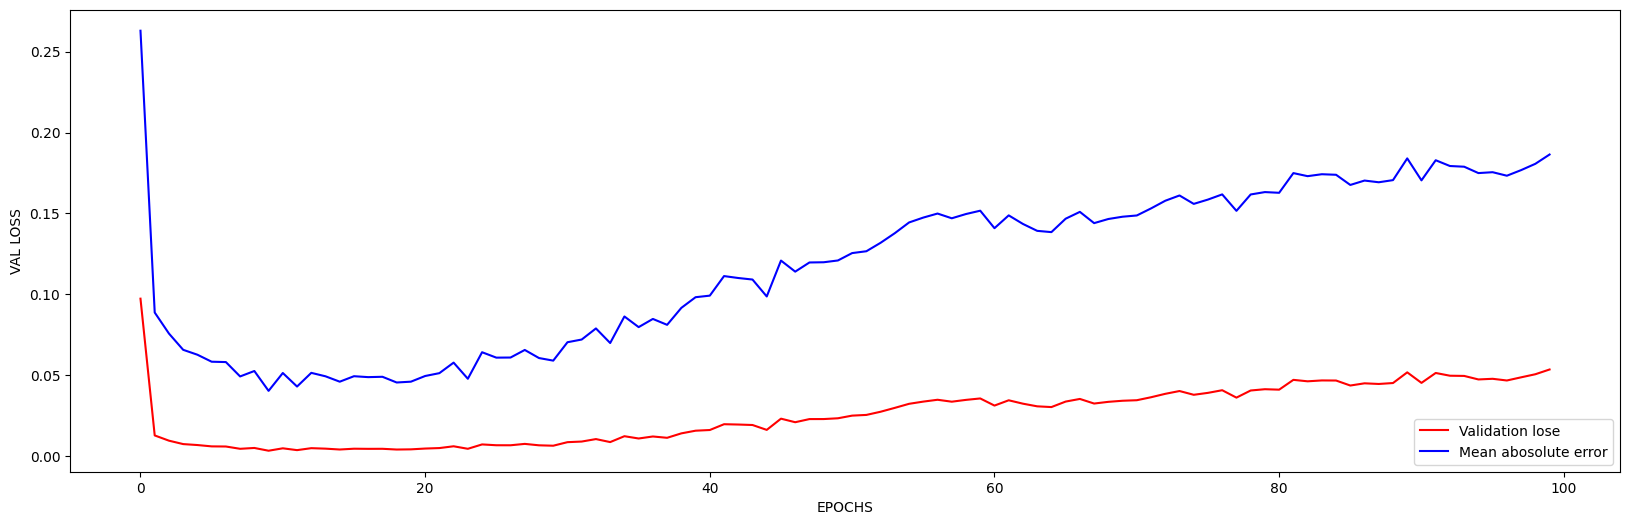

In [59]:
plt.figure(figsize=(20,6))
plt.plot(history.history['val_loss'],label='Validation lose',color='RED')
plt.plot(history.history['val_mean_absolute_error'],label='Mean abosolute error',color='BLUE')
plt.xlabel('EPOCHS')
plt.ylabel('VAL LOSS')
plt.legend(loc='lower right')
plt.show()


THE R2 SCORE OF LSTM : 0.19517702781152502
THE MEAN SQUARED ERROR OF LSTM MODEL IS :0.18639945291408563


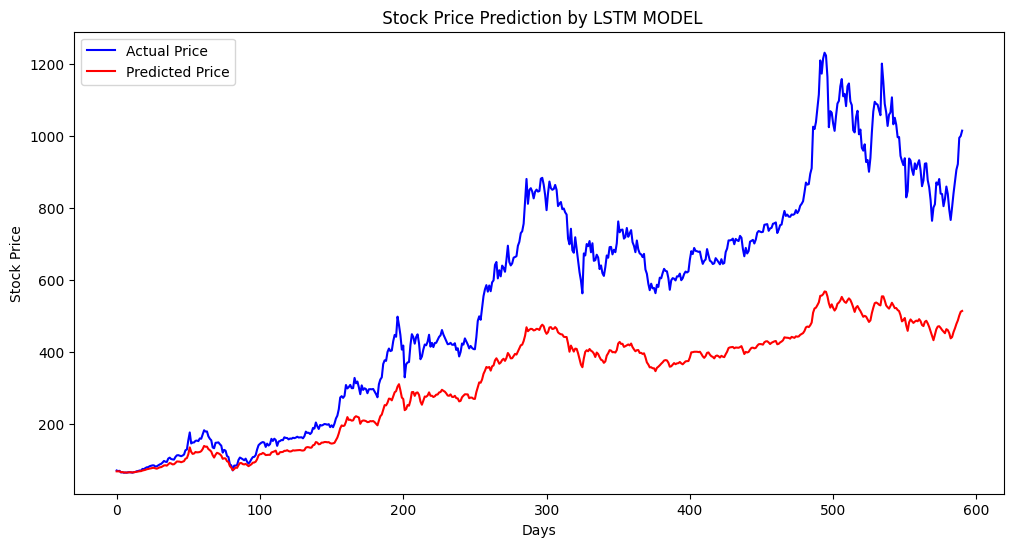

In [62]:
y_test_actual = scaler.inverse_transform(np.hstack((X_test.reshape(X_test.shape[0], 5), y_test.reshape(-1, 1))))[:, -1]
y_pred_actual = scaler.inverse_transform(np.hstack((X_test.reshape(X_test.shape[0], 5), y_pred.reshape(-1, 1))))[:, -1]


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_lstm=r2_score(y_test,y_pred)
print(f'THE R2 SCORE OF LSTM : {r2_lstm}')
MAE_lstm=mean_absolute_error(y_test,y_pred)
print(f'THE MEAN SQUARED ERROR OF LSTM MODEL IS :{MAE_lstm}')

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Price", color="blue")
plt.plot(y_pred_actual, label="Predicted Price", color="red")
plt.title(" Stock Price Prediction by LSTM MODEL")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [63]:
COMPATION_DF=pd.DataFrame({ 'MODEL':['LINEAR REGRESSION ','RANDOM FOREST','LSTM MODEL'],
                          'R2  SCORE ':[r2_linear_regresion,r2_random_forest,r2_lstm],
                           ' MEAN ABSOLUTE ERROR ': [MAE_lr,MAE_rf,MAE_lstm]})

In [69]:
COMPATION_DF.sort_values(by='R2  SCORE ',ascending=False)

,MODEL,R2 SCORE,MEAN ABSOLUTE ERROR
0,LINEAR REGRESSION,1.000000,8.958600e-14
2,LSTM MODEL,0.195177,1.863995e-01
1,RANDOM FOREST,-2.220306,4.722824e+02
